# Introduction to Neural Network Classification with Tensorflow

A classification problem is where you try to classify something as one thing or another
* Binray Classfication
* Multiclass classification
* Multilabel classification

### Creating data to view and fit

In [1]:
import pandas as pd
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
# Make 1000 examples
n_samples = 1000

# Create circles

X, y = make_circles(
    n_samples,
    noise=0.03
)

In [3]:
# Check out the features
X[:5], y[:5]

(array([[-0.15656361, -0.79980318],
        [-0.72506115,  0.4048247 ],
        [-0.00198027,  0.77857783],
        [ 0.3826437 ,  0.89651673],
        [ 0.06535349,  0.81005524]]),
 array([1, 1, 1, 0, 1], dtype=int64))

In [4]:
circles = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'label': y})
circles

,X0,X1,label
0,-0.156564,-0.799803,1
1,-0.725061,0.404825,1
2,-0.001980,0.778578,1
3,0.382644,0.896517,0
4,0.065353,0.810055,1
...,...,...,...
4995,-0.007916,-1.006895,0
4996,-0.245009,-0.769560,1
4997,0.092125,-1.077270,0
4998,0.596812,0.561419,1


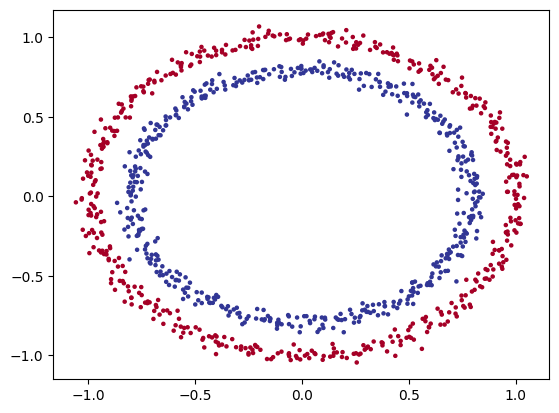

In [3]:
# Plot
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, s=5)

### Input and Output shapes

In [6]:
X.shape, y.shape

((5000, 2), (5000,))

In [7]:
len(X), len(y)

(5000, 5000)

In [8]:
# View the first example
X[0], y[0]

(array([-0.15656361, -0.79980318]), 1)

## Steps in modelling

In [10]:
# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model_1
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['accuracy'])

# 3. Fit the model_1
model_1.fit(X, y, epochs=5)

Epoch 1/5
157/157 [==============================] - 1s 3ms/step - loss: 4.5428 - accuracy: 0.4994
Epoch 2/5
157/157 [==============================] - 0s 2ms/step - loss: 0.7017 - accuracy: 0.4916
Epoch 3/5
157/157 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4970
Epoch 4/5
157/157 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4800
Epoch 5/5
157/157 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4846


In [11]:
# Let's train for longer
model_1.fit(X, y, epochs=200)


Epoch 1/200
157/157 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4888
Epoch 2/200
157/157 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5054
Epoch 3/200
157/157 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4944
Epoch 4/200
157/157 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4940
Epoch 5/200
157/157 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5046
Epoch 6/200
157/157 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4888
Epoch 7/200
157/157 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4938
Epoch 8/200
157/157 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4764
Epoch 9/200
157/157 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4784
Epoch 10/200
157/157 [==============================] - 0s 2ms/step - loss: 0.6941 - accura

Since this is a binary classification problem and our model is getting around ~50% accuracy it is performing as if it's guessing. Not statistically better model than doing a coin flip.

Let's add a layer.

In [12]:
# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

# 4. Evaluate the model
model_2.evaluate(X, y)

157/157 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933228969573975, 0.5]

### Improving our model

In [13]:
# 1. Create the model with more units
model_3 = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

# 4. Evaluate the model
model_3.evaluate(X, y)

157/157 [==============================] - 1s 2ms/step - loss: 0.6940 - accuracy: 0.5000


[0.6939693093299866, 0.5]

We'll create a function to visualize the model's decisions.

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid with numpy of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as line between zones (where each unique class falls)

In [14]:
import numpy as np

In [4]:
from decbound import plot_decision_boundary

1250/1250 [==============================] - 3s 2ms/step
Binary


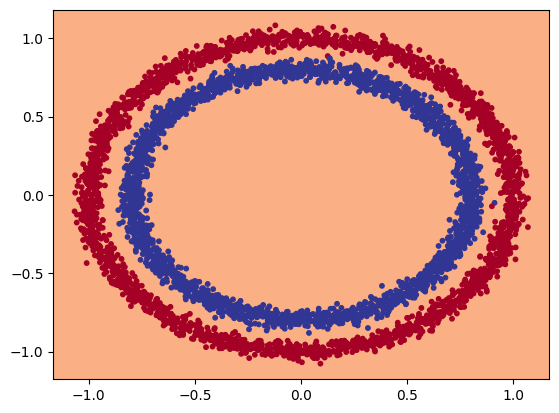

In [16]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X=X, y=y)

The decision model is trying to plot a regression, however, it is not a regression problem.
_We have not introduced NON-LINEARITY to our model yet._

## Introducing: NON-LINEARITY

In [17]:
# 1. Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the mode
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
157/157 [==============================] - 1s 3ms/step - loss: 4.5382 - accuracy: 0.4742
Epoch 2/100
157/157 [==============================] - 0s 3ms/step - loss: 4.4681 - accuracy: 0.4722
Epoch 3/100
157/157 [==============================] - 0s 2ms/step - loss: 4.4446 - accuracy: 0.4716
Epoch 4/100
157/157 [==============================] - 0s 2ms/step - loss: 4.4050 - accuracy: 0.4718
Epoch 5/100
157/157 [==============================] - 0s 3ms/step - loss: 4.3617 - accuracy: 0.4736
Epoch 6/100
157/157 [==============================] - 0s 3ms/step - loss: 4.2349 - accuracy: 0.4758
Epoch 7/100
157/157 [==============================] - 0s 2ms/step - loss: 4.1096 - accuracy: 0.4756
Epoch 8/100
157/157 [==============================] - 0s 2ms/step - loss: 3.9639 - accuracy: 0.4764
Epoch 9/100
157/157 [==============================] - 0s 2ms/step - loss: 3.7798 - accuracy: 0.4798
Epoch 10/100
157/157 [==============================] - 0s 2ms/step - loss: 3.6272 - accura

1250/1250 [==============================] - 2s 2ms/step
Binary


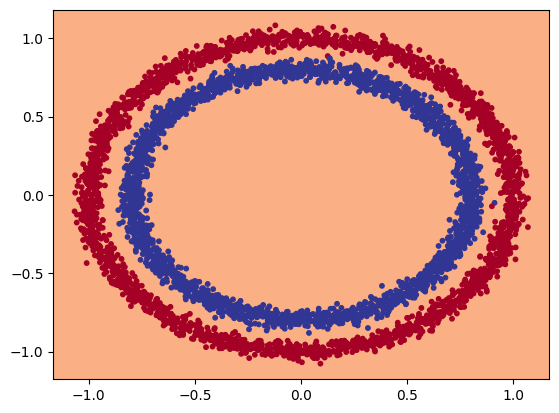

In [18]:
# Check the decision boundary
plot_decision_boundary(model_4, X, y)

Let's try to build our first neural network with a non-linear activation.

In [19]:
# 1. Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
157/157 [==============================] - 1s 3ms/step - loss: 5.4606 - accuracy: 0.4786
Epoch 2/100
157/157 [==============================] - 0s 3ms/step - loss: 5.2353 - accuracy: 0.4780
Epoch 3/100
157/157 [==============================] - 0s 3ms/step - loss: 5.1373 - accuracy: 0.4764
Epoch 4/100
157/157 [==============================] - 0s 3ms/step - loss: 4.9219 - accuracy: 0.4754
Epoch 5/100
157/157 [==============================] - 0s 3ms/step - loss: 4.6559 - accuracy: 0.4736
Epoch 6/100
157/157 [==============================] - 0s 3ms/step - loss: 4.5587 - accuracy: 0.4732
Epoch 7/100
157/157 [==============================] - 0s 3ms/step - loss: 4.5143 - accuracy: 0.4728
Epoch 8/100
157/157 [==============================] - 0s 3ms/step - loss: 4.4804 - accuracy: 0.4734
Epoch 9/100
157/157 [==============================] - 0s 3ms/step - loss: 4.4640 - accuracy: 0.4736
Epoch 10/100
157/157 [==============================] - 0s 3ms/step - loss: 4.4571 - accura

In [20]:
# 1. Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. Compile the mode
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
157/157 [==============================] - 2s 3ms/step - loss: 1.1861 - accuracy: 0.4594
Epoch 2/250
157/157 [==============================] - 0s 3ms/step - loss: 0.7673 - accuracy: 0.4628
Epoch 3/250
157/157 [==============================] - 1s 3ms/step - loss: 0.7313 - accuracy: 0.4090
Epoch 4/250
157/157 [==============================] - 0s 3ms/step - loss: 0.7126 - accuracy: 0.3802
Epoch 5/250
157/157 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5044
Epoch 6/250
157/157 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.5304
Epoch 7/250
157/157 [==============================] - 0s 3ms/step - loss: 0.6817 - accuracy: 0.5380
Epoch 8/250
157/157 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.5374
Epoch 9/250
157/157 [==============================] - 0s 3ms/step - loss: 0.6764 - accuracy: 0.5414
Epoch 10/250
157/157 [==============================] - 0s 3ms/step - loss: 0.6757 - accura

1250/1250 [==============================] - 2s 2ms/step
Binary


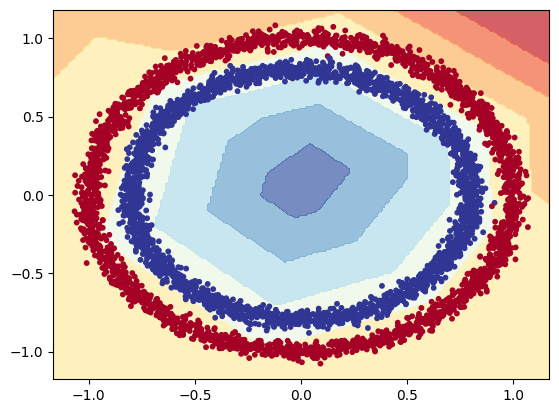

In [21]:
plot_decision_boundary(model_6, X, y)

In [22]:
# 1. Create a model that has the sigmoid activation function at the output layer
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.hard_sigmoid)
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
157/157 [==============================] - 1s 2ms/step - loss: 0.6907 - accuracy: 0.5014
Epoch 2/100
157/157 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5178
Epoch 3/100
157/157 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.5244
Epoch 4/100
157/157 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5216
Epoch 5/100
157/157 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5262
Epoch 6/100
157/157 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5434
Epoch 7/100
157/157 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.5454
Epoch 8/100
157/157 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.5468
Epoch 9/100
157/157 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.5912
Epoch 10/100
157/157 [==============================] - 0s 2ms/step - loss: 0.6552 - accura

1250/1250 [==============================] - 2s 2ms/step
Binary


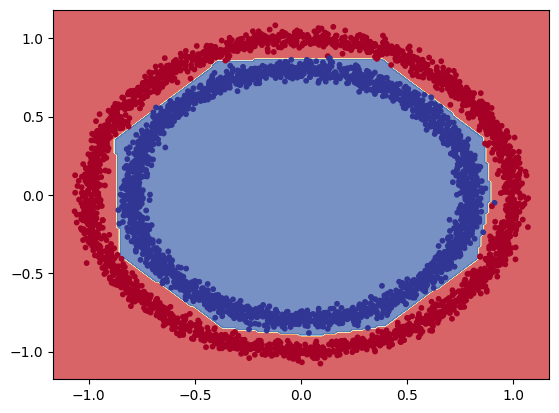

In [23]:
plot_decision_boundary(model_7, X, y)

In [24]:
model_7.evaluate(X, y)

157/157 [==============================] - 1s 3ms/step - loss: 0.0084 - accuracy: 0.9984


[0.008375433273613453, 0.9983999729156494]

In [25]:
# Create a new toy tensor
A = tf.cast(tf.range(-10, 10, 0.1), tf.float32)

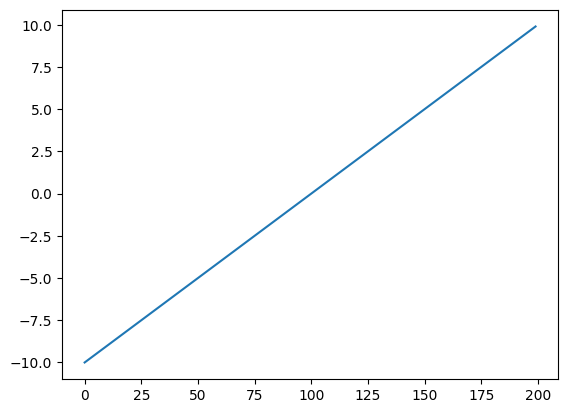

In [26]:
plt.plot(A)

In [27]:
# Let's start by replicating sigmoid
def sigmoid(x):
    return 1 / (1 + tf.math.exp(-x))

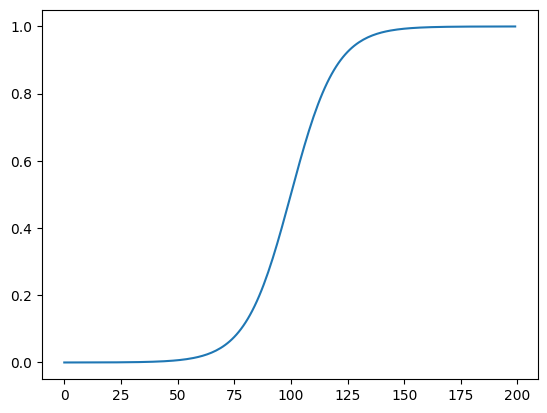

In [28]:
plt.plot(sigmoid(A))

In [29]:
# Let's replicate ReLU
def relu(x):
    return tf.maximum(0, x)

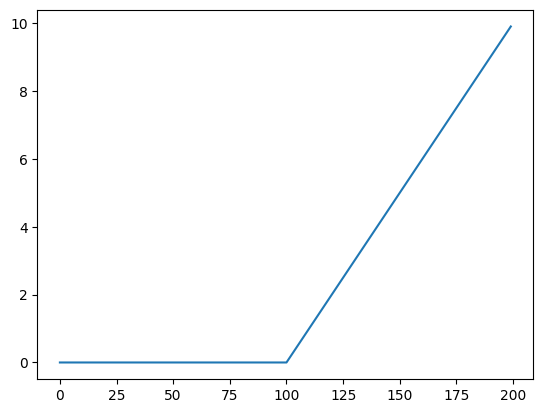

In [30]:
plt.plot(relu(A))

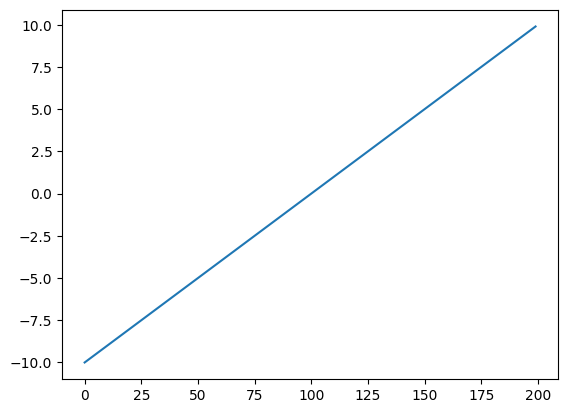

In [31]:
plt.plot(tf.keras.activations.linear(A))

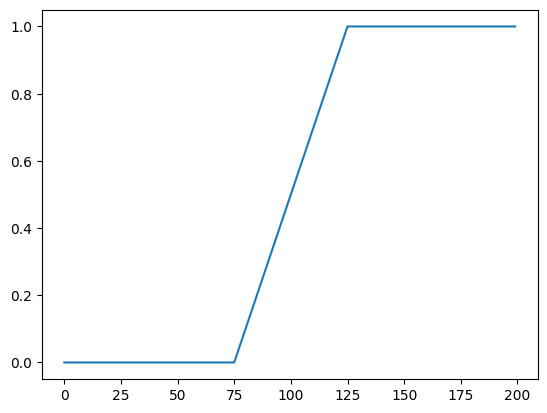

In [32]:
plt.plot(tf.keras.activations.hard_sigmoid(A))

> 📖 **Resource:** Activation Functions: https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

## Evaluating and Improving our Classification Model

So far we've been training and testing on the same dataset; however, this is a sin.

In [6]:
# Split into datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
# Let's recreate our model
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

# 3. Fit the model
history = model.fit(
    X_train, y_train,
    # epochs=300,
    epochs=25
    # verbose=0,
    # callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy',
    #                                             patience=10, 
    #                                             restore_best_weights=True)]
)

# 4. Evaluate the model
model.evaluate(X_test, y_test)

Epoch 1/25
125/125 [==============================] - 1s 2ms/step - loss: 0.6797 - accuracy: 0.5778
Epoch 2/25
125/125 [==============================] - 0s 2ms/step - loss: 0.6113 - accuracy: 0.7138
Epoch 3/25
125/125 [==============================] - 0s 2ms/step - loss: 0.4745 - accuracy: 0.8382
Epoch 4/25
125/125 [==============================] - 0s 2ms/step - loss: 0.3051 - accuracy: 0.9420
Epoch 5/25
125/125 [==============================] - 0s 2ms/step - loss: 0.1985 - accuracy: 0.9707
Epoch 6/25
125/125 [==============================] - 0s 2ms/step - loss: 0.1353 - accuracy: 0.9843
Epoch 7/25
125/125 [==============================] - 0s 2ms/step - loss: 0.1017 - accuracy: 0.9868
Epoch 8/25
125/125 [==============================] - 0s 2ms/step - loss: 0.0837 - accuracy: 0.9875
Epoch 9/25
125/125 [==============================] - 0s 2ms/step - loss: 0.0733 - accuracy: 0.9875
Epoch 10/25
125/125 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9865

[0.035020437091588974, 0.9909999966621399]

1250/1250 [==============================] - 2s 2ms/step
Binary
1250/1250 [==============================] - 2s 2ms/step
Binary


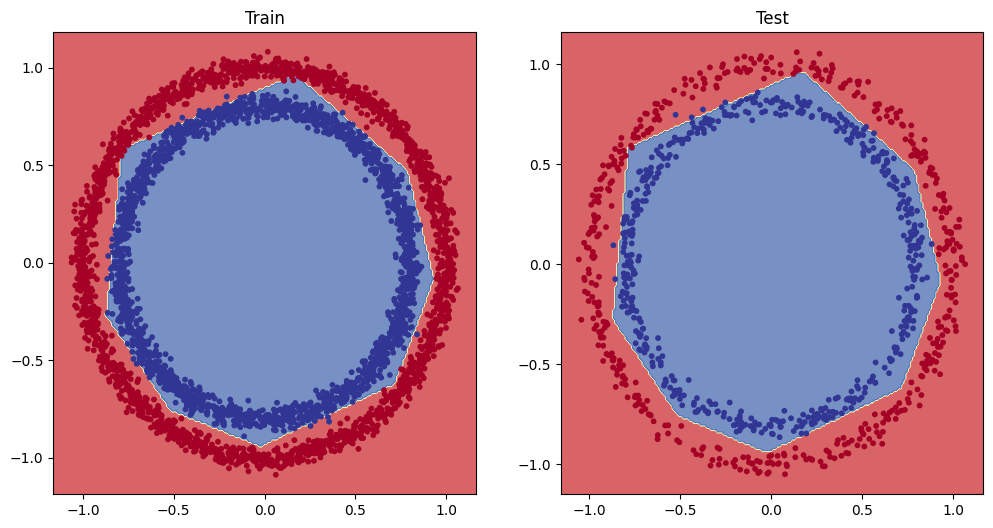

In [46]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model, X_test, y_test)
plt.show()

### Plot the loss curves

Text(0.5, 0, 'Epochs')

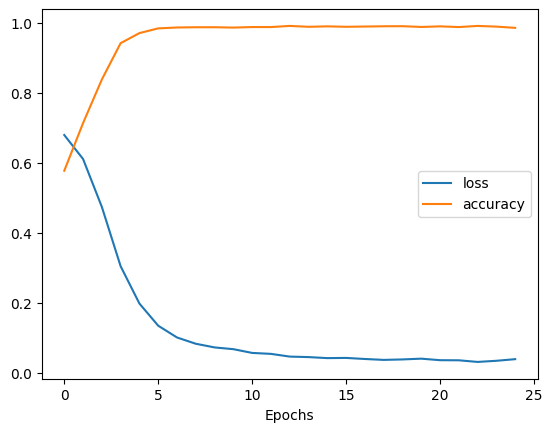

In [47]:
pd.DataFrame(history.history).plot()
plt.xlabel('Epochs')

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback**
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves

In [7]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * np.exp(epoch/10))

# 3. Fit the model
history = model.fit(X_train, 
                    y_train,
                    epochs=100,
                    callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7462 - accuracy: 0.5063 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7447 - accuracy: 0.5000 - lr: 1.1052e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7433 - accuracy: 0.4963 - lr: 1.2214e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7417 - accuracy: 0.4963 - lr: 1.3499e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7400 - accuracy: 0.4950 - lr: 1.4918e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7383 - accuracy: 0.4950 - lr: 1.6487e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7365 - accuracy: 0.4863 - lr: 1.8221e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7346 - accuracy: 0.4725 - lr: 2.0138e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<AxesSubplot: >

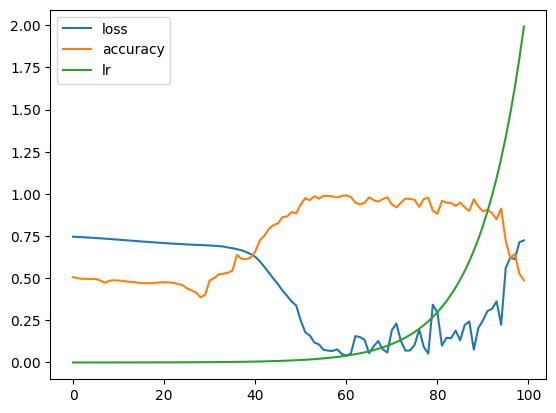

In [8]:
pd.DataFrame(history.history).plot()

Text(0.5, 1.0, 'Learning rate vs. Loss')

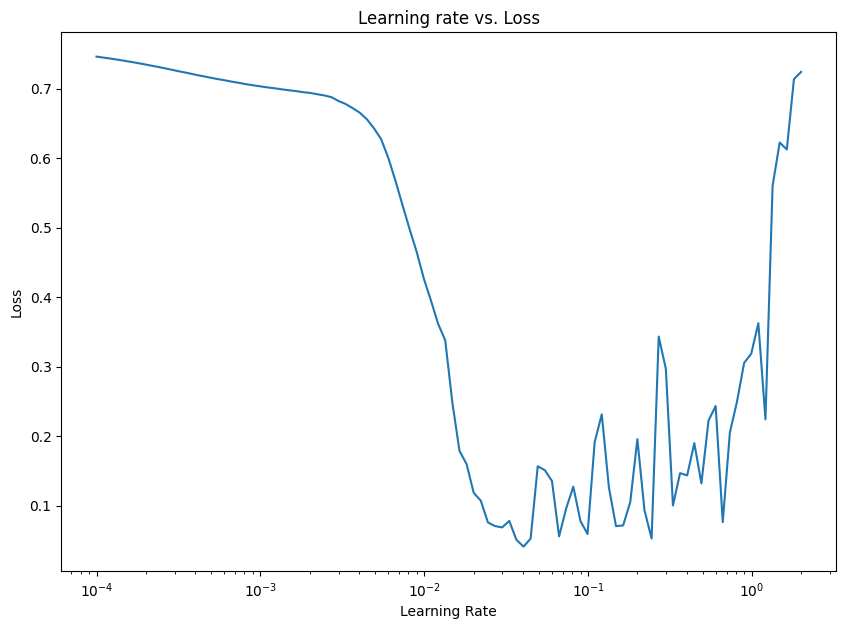

In [9]:
# Plot the learning rate versus the loss
lrs = 1e-4 * np.exp(tf.range(100)/10)
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. Loss')

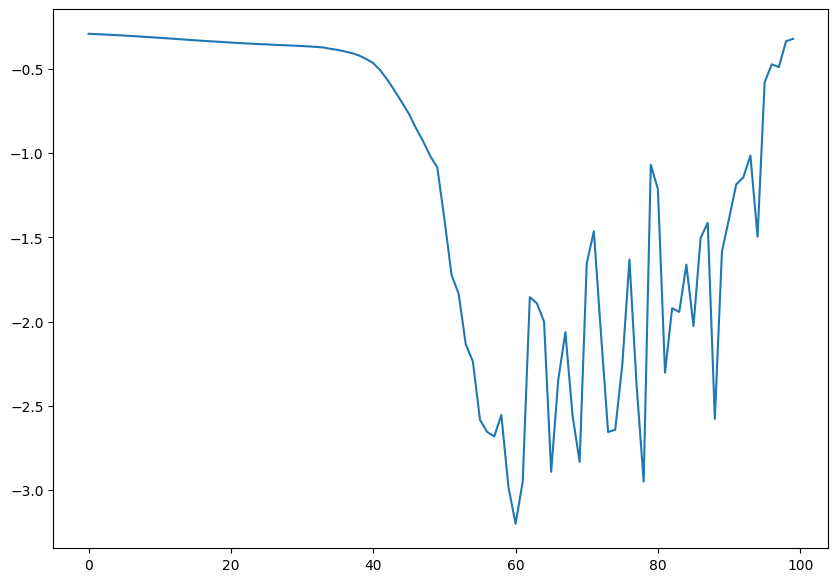

In [10]:
# Finding the discrete derivative of loss
plt.figure(figsize=(10, 7))
plt.plot(np.log(history.history['loss']))

0.02988674009670603


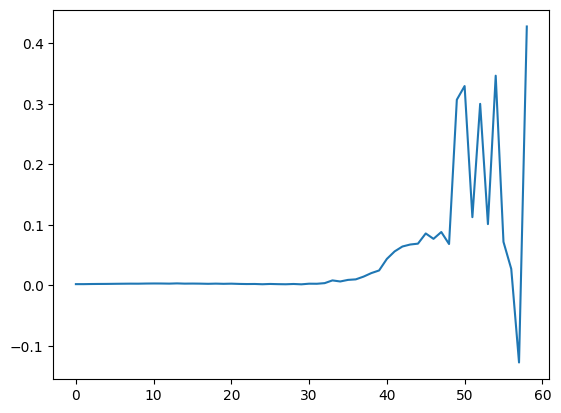

In [11]:
logloss = np.log(history.history['loss'])[:60]
logloss_prime = logloss[:-1] - logloss[1:]
plt.plot(logloss_prime)
opti_lr = lrs[logloss_prime.argmin()]
print(opti_lr)

In [12]:
# 1. Create a faster learning model
lr_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
lr_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=opti_lr),
                 metrics=['accuracy'])

# 3. Fit the model
opti_history = lr_model.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 4ms/step - loss: 0.7014 - accuracy: 0.4750
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.5688
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6796 - accuracy: 0.5512
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6675 - accuracy: 0.5900
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6558 - accuracy: 0.5925
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6450 - accuracy: 0.6187
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6299 - accuracy: 0.6237
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6155 - accuracy: 0.6375
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5929 - accuracy: 0.6712
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5387 - accuracy: 0.7400
Epoch 11/20
25/25 [

## $\textbf{Classification evaluation methods}$

* $\textbf{Accuracy}$
    * `tf.keras.metrics.Accuracy()`
    * $Accuracy = \frac{tp+tn}{tp+tn+fp+fn}$
    * Default metric for classification problems. Not the best for imbalanced classes.
* $\textbf{Precision}$
    * `tf.keras.metrics.Precision()`
    * $Precision = \frac{tp}{tp+fp}$
    * Higher precision leads to less false positives.
* $\textbf{Recall}$
    * `tf.keras.metrics.Recall()`
    * $Recall = \frac{tp}{tp+fn}$
    * Higher recall leads to less false negatives
- Precision/Recall Tradeoff - you can't have both
* $\textbf{F1-score}$
    * `tf.keras.metrics.f1_score()`
    * $F1-score = 2\frac{precision * recall}{precision + recall}$
    * Combination of precision and recall, usually a good overall metric for a classification method.
* $\textbf{Confusion Matrix}$
    * Custom function or `sklearn.metrics.confusion_matrix()`
    * $NA$
    * When comparing predictions to truth labels to see where model gets confused. Can be hard to use with large number of classes.

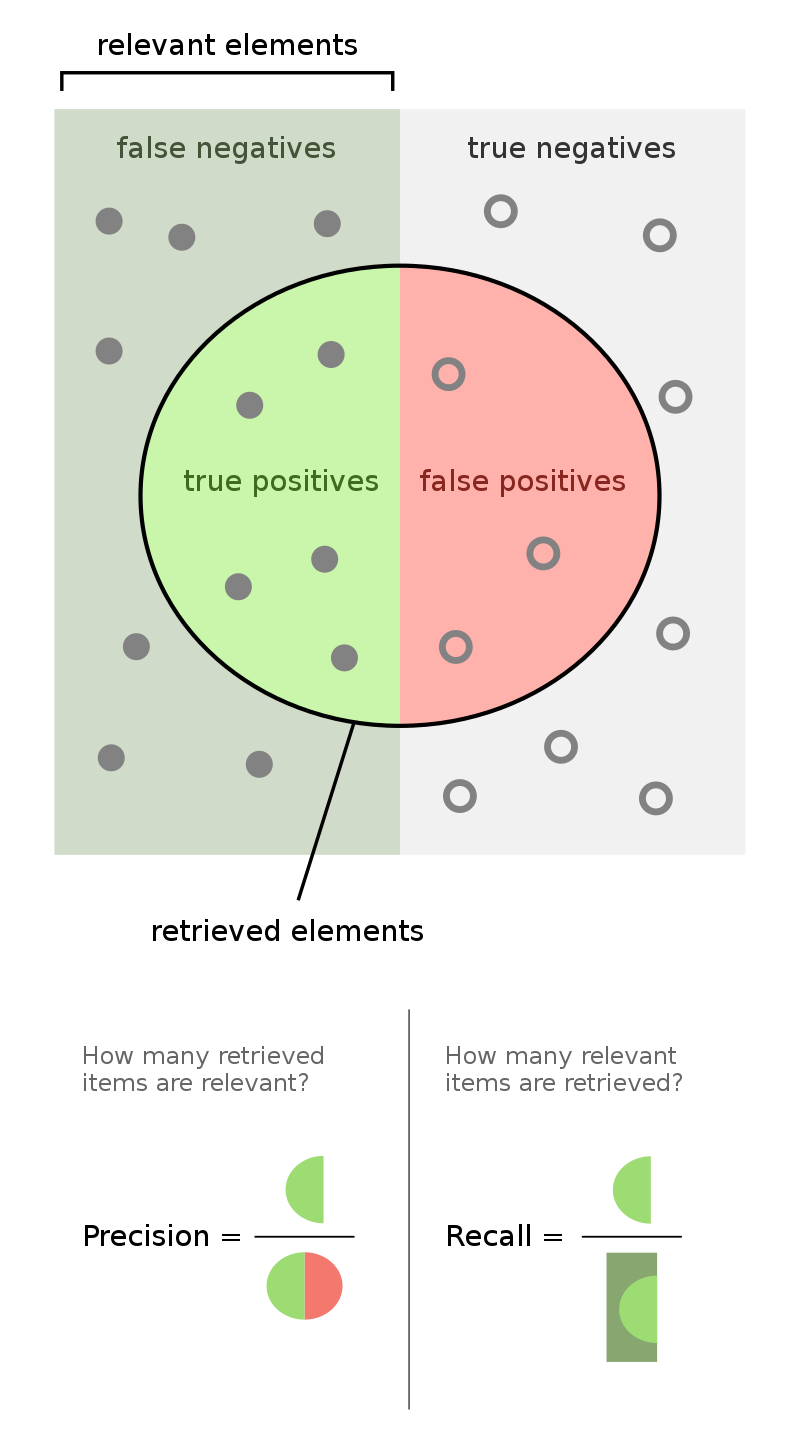

In [13]:
loss, accuracy = lr_model.evaluate(X_test, y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {(accuracy*100):.2f}')

7/7 [==============================] - 0s 3ms/step - loss: 0.4006 - accuracy: 0.7950
Model loss on the test set: 0.40057671070098877
Model accuracy on the test set: 79.50


In [18]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix

# Make predicitons
y_pred = lr_model.predict(X_test)

# Convert from prediction probability form to actual binary predictions.
y_pred = tf.round(y_pred)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Y-axis represents true values and X-axis represents predicted values

7/7 [==============================] - 0s 3ms/step


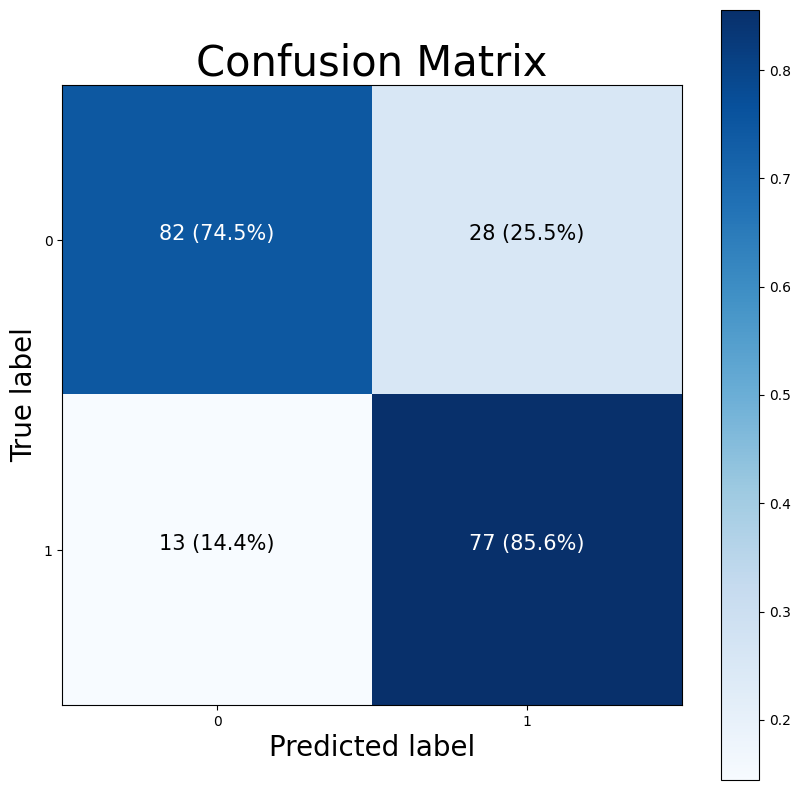

In [42]:
from plot_confusion_matrix import plot_confusion_matrix as pcm


pcm(cm)